### Learning guide of deeplearning by the help of tensorflow 

Epoch 1/5


c:\Users\svish\OneDrive\Desktop\jupyter-notebook\venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9276 - loss: 0.2469 - val_accuracy: 0.9727 - val_loss: 0.0979
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9683 - loss: 0.1044 - val_accuracy: 0.9720 - val_loss: 0.0948
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9772 - loss: 0.0736 - val_accuracy: 0.9732 - val_loss: 0.0950
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9823 - loss: 0.0563 - val_accuracy: 0.9765 - val_loss: 0.0919
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9858 - loss: 0.0440 - val_accuracy: 0.9760 - val_loss: 0.0841
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9763 - loss: 0.0800

Test Accuracy: 97.63%
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Image 0: Predicted = 7, Actual = 7, Correct? True
Image 1: Predicted = 2, Actual = 2, Correct? True
Image 2: Predicted = 1, Actual = 1, Correct? True
Image 3: Predicted = 0, Actual = 0, Correct? True
Image 4: Predicted = 4, Ac

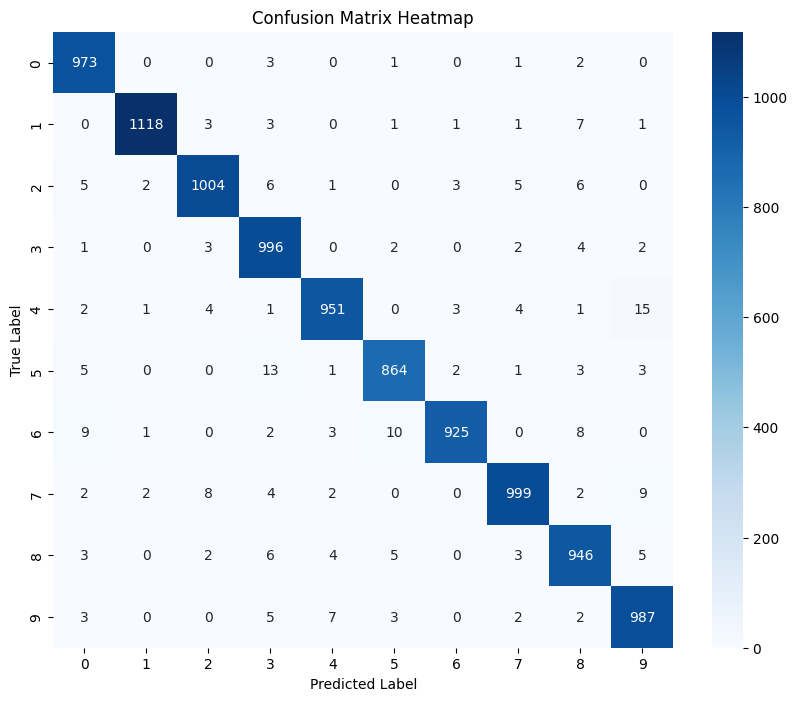

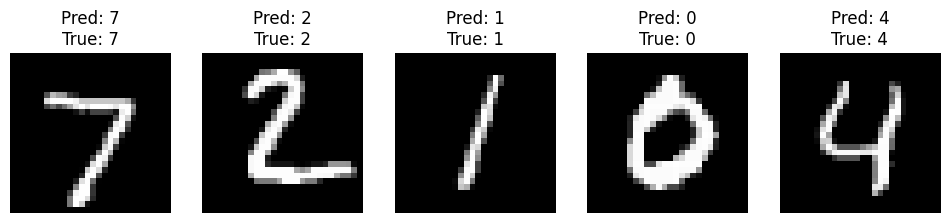

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


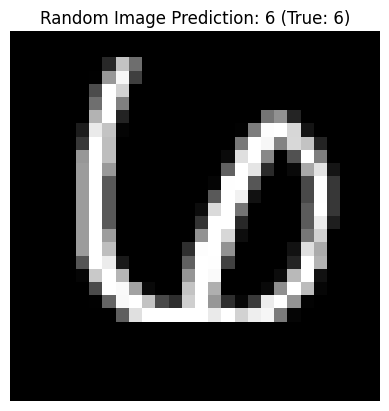

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
import random

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 784).astype("float32") / 255
x_test = x_test.reshape(x_test.shape[0], 784).astype("float32") / 255

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")

predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

for i in range(10):
    print(f"Image {i}: Predicted = {predicted_classes[i]}, Actual = {y_test[i]}, Correct? {predicted_classes[i] == y_test[i]}")

acc_score = accuracy_score(y_test, predicted_classes)
print(f"\nAccuracy Score (sklearn): {acc_score * 100:.2f}%")

cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

plt.figure(figsize=(12, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_classes[i]}\nTrue: {y_test[i]}")
    plt.axis('off')
plt.show()

random_index = random.randint(0, len(x_test)-1)
random_image = x_test[random_index].reshape(1, 784)
random_prediction = np.argmax(model.predict(random_image), axis=1)[0]

plt.imshow(x_test[random_index].reshape(28, 28), cmap='gray')
plt.title(f"Random Image Prediction: {random_prediction} (True: {y_test[random_index]})")
plt.axis('off')
plt.show()


### Activation functions 


1.) sigmoid function

In [3]:
import tensorflow as tf
from keras import layers, models
import numpy as np

x_train = np.array([
    [0.2, 0.5, 0.8],
    [0.9, 0.1, 0.4],
    [0.5, 0.7, 0.2],
    [0.8, 0.5, 0.9],
    [0.1, 0.3, 0.6]
])

y_train = np.array([
    [0],
    [1],
    [0],
    [1],
    [0]
])

model_sigmoid = models.Sequential([
    layers.Dense(1, activation='sigmoid', input_shape=(3,))
])

model_sigmoid.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_sigmoid.fit(x_train, y_train, epochs=100, verbose=0)

x_test = np.array([[0.5, 1.0, 2.0]])
output = model_sigmoid.predict(x_test)
print("Sigmoid Output:", output)


c:\Users\svish\OneDrive\Desktop\jupyter-notebook\venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Sigmoid Output: [[0.55782133]]


2.)tanh activation

In [4]:
import tensorflow as tf
from keras import layers, models
import numpy as np

x_train = np.array([
    [0.2, 0.5, 0.8],
    [0.9, 0.1, 0.4],
    [0.5, 0.7, 0.2],
    [0.8, 0.5, 0.9],
    [0.1, 0.3, 0.6]
])

y_train = np.array([
    [0],
    [1],
    [0],
    [1],
    [0]
])

model_tanh = models.Sequential([
    layers.Dense(1, activation='tanh', input_shape=(3,))
])

model_tanh.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model_tanh.fit(x_train, y_train, epochs=100, verbose=0)

x_test = np.array([[0.5, 1.0, 2.0]])
output = model_tanh.predict(x_test)
print("Tanh Output:", output)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Tanh Output: [[0.97498536]]


3.)ReLU (Rectified Linear Unit)

In [ ]:
import tensorflow as tf
from keras import layers, models
import numpy as np

x_train = np.array([
    [-2.0],
    [-1.0],
    [0.0],
    [1.0],
    [2.0]
])

y_train = np.array([
    [0.0],
    [0.0],
    [1.0],
    [2.0],
    [3.0]
])

model_relu = models.Sequential([
    layers.Dense(1, activation='relu', input_shape=(1,))
])

model_relu.compile(optimizer='adam', loss='mse')
model_relu.fit(x_train, y_train, epochs=200, verbose=0)

x_test = np.array([[-3.0], [0.5], [2.5]])
output = model_relu.predict(x_test)
print("ReLU Output:", output)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
ReLU Output: [[0.       ]
 [0.4929611]
 [1.7061609]]


4.)Leaky ReLU

In [7]:
import tensorflow as tf
from keras import layers, models
import numpy as np

x_train = np.array([
    [-3.0],
    [-1.0],
    [0.0],
    [1.0],
    [3.0]
])

y_train = np.array([
    [-2.0],
    [-0.5],
    [0.0],
    [1.0],
    [3.0]
])

model_leaky_relu = models.Sequential([
    layers.Dense(1, activation=tf.keras.layers.LeakyReLU(alpha=0.1), input_shape=(1,))
])

model_leaky_relu.compile(optimizer='adam', loss='mse')
model_leaky_relu.fit(x_train, y_train, epochs=200, verbose=0)

x_test = np.array([[-2.5], [-1.0], [0.5], [2.0]])
output = model_leaky_relu.predict(x_test)
print("Leaky ReLU Output:", output)


c:\Users\svish\OneDrive\Desktop\jupyter-notebook\venv\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Leaky ReLU Output: [[-0.32051057]
 [-0.13824709]
 [ 0.4401638 ]
 [ 2.2627985 ]]


5.)ELU (Exponential Linear Unit)


In [8]:
import tensorflow as tf
from keras import layers, models
import numpy as np

x_train = np.array([
    [-3.0],
    [-1.0],
    [0.0],
    [1.0],
    [3.0]
])

y_train = np.array([
    [-2.0],
    [-0.5],
    [0.0],
    [1.0],
    [3.0]
])

model_elu = models.Sequential([
    layers.Dense(1, activation=tf.keras.layers.ELU(alpha=1.0), input_shape=(1,))
])

model_elu.compile(optimizer='adam', loss='mse')
model_elu.fit(x_train, y_train, epochs=200, verbose=0)

x_test = np.array([[-2.5], [-1.0], [0.5], [2.0]])
output = model_elu.predict(x_test)
print("ELU Output:", output)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
ELU Output: [[-0.3719017 ]
 [-0.07380229]
 [ 0.3117236 ]
 [ 0.7001147 ]]


6.) Softmax Activation

In [9]:
import tensorflow as tf
from keras import layers, models
import numpy as np

x_train = np.array([
    [1.0, 2.0],
    [1.5, 1.8],
    [5.0, 8.0],
    [6.0, 9.0],
    [8.0, 8.0],
    [9.0, 11.0]
])

y_train = np.array([0, 0, 1, 1, 2, 2])

model_softmax = models.Sequential([
    layers.Dense(3, activation='softmax', input_shape=(2,))
])

model_softmax.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_softmax.fit(x_train, y_train, epochs=200, verbose=0)

x_test = np.array([[2.0, 3.0], [7.0, 9.0], [8.5, 10.0]])
output = model_softmax.predict(x_test)
print("Softmax Probabilities:\n", output)
print("Predicted Classes:", np.argmax(output, axis=1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Softmax Probabilities:
 [[0.40207353 0.19096184 0.40696466]
 [0.28779423 0.01908309 0.6931226 ]
 [0.23922734 0.008882   0.75189066]]
Predicted Classes: [2 2 2]


* loss and cost function in deep learning 


In [ ]:
import tensorflow as tf
from keras import layers, models
import numpy as np
x_train = np.array([[0], [1], [2], [3], [4]], dtype=float)
y_train_reg = np.array([[0], [2], [4], [6], [8]], dtype=float)   # Regression target
y_train_bin = np.array([0, 1, 1, 0, 1])                         # Binary classification target
y_train_multi = tf.keras.utils.to_categorical([0, 1, 2, 1, 0], num_classes=3)  # Multi-class

model_mse = models.Sequential([
    layers.Dense(1, input_shape=(1,))
])
model_mse.compile(optimizer='adam', loss='mse')
history_mse = model_mse.fit(x_train, y_train_reg, epochs=100, verbose=0)
print("Final MSE Loss:", history_mse.history['loss'][-1])

model_bin = models.Sequential([
    layers.Dense(1, activation='sigmoid', input_shape=(1,))
])
model_bin.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_bin = model_bin.fit(x_train, y_train_bin, epochs=100, verbose=0)
print("Final Binary Crossentropy Loss:", history_bin.history['loss'][-1])


model_multi = models.Sequential([
    layers.Dense(3, activation='softmax', input_shape=(1,))
])
model_multi.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_multi = model_multi.fit(x_train, y_train_multi, epochs=100, verbose=0)
print("Final Categorical Crossentropy Loss:", history_multi.history['loss'][-1])


Final MSE Loss: 30.352313995361328
Final Binary Crossentropy Loss: 1.0129905939102173
Final Categorical Crossentropy Loss: 1.3841476440429688


* gradient descent and its types in deep learning 


1.) batch gradient descent 

Final Weight (Batch GD): 2.9654123548617948


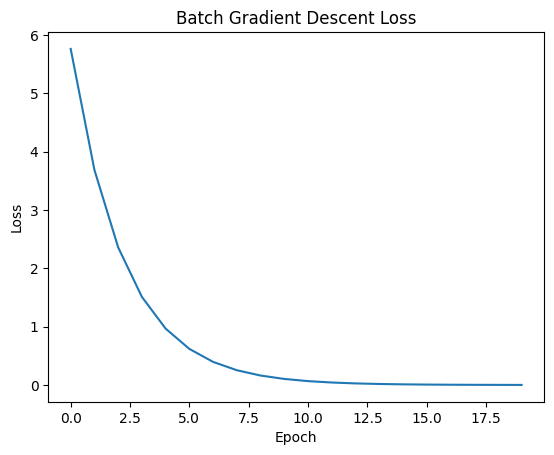

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def loss(w):
    return (w - 3) ** 2

def gradient(w):
    return 2 * (w - 3)

w = 0  
learning_rate = 0.1
epochs = 20
history = []

for i in range(epochs):
    grad = gradient(w)
    w -= learning_rate * grad
    history.append(loss(w))

print("Final Weight (Batch GD):", w)
plt.plot(history)
plt.title("Batch Gradient Descent Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


2.) Stochastic Gradient Descent (SGD)

Final Weight (SGD): 1.99999798582723


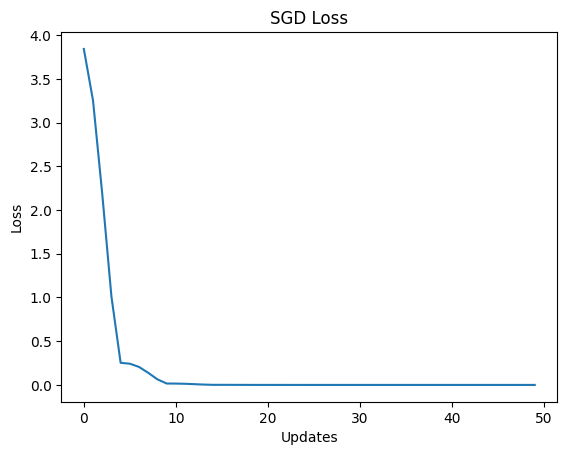

In [ ]:
data = [1, 2, 3, 4, 5]  
labels = [2, 4, 6, 8, 10]  

w = 0
learning_rate = 0.01
epochs = 10
history = []

for epoch in range(epochs):
    for x, y in zip(data, labels):
        grad = 2 * x * (w*x - y)  
        w -= learning_rate * grad
        history.append((w - 2)**2)  

print("Final Weight (SGD):", w)
plt.plot(history)
plt.title("SGD Loss")
plt.xlabel("Updates")
plt.ylabel("Loss")
plt.show()


3.)Mini-Batch Gradient Descent

Final Weight (Mini-Batch GD): 1.999934146520635


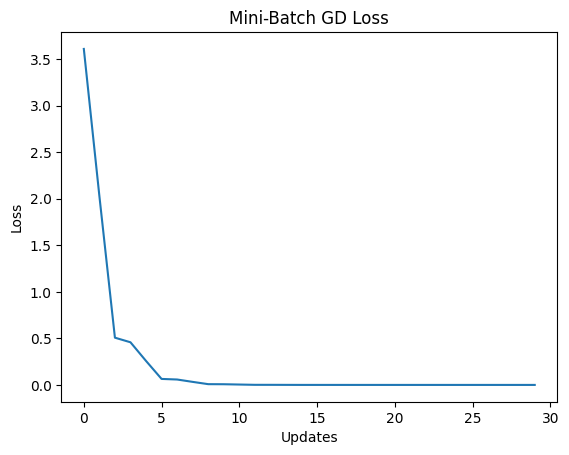

In [13]:
X = np.array([1, 2, 3, 4, 5])
Y = np.array([2, 4, 6, 8, 10])
w = 0
learning_rate = 0.01
epochs = 10
batch_size = 2
history = []

for epoch in range(epochs):
    for i in range(0, len(X), batch_size):
        X_batch = X[i:i+batch_size]
        Y_batch = Y[i:i+batch_size]
        grad = np.mean(2 * X_batch * (w*X_batch - Y_batch))
        w -= learning_rate * grad
        history.append((w - 2)**2)  

print("Final Weight (Mini-Batch GD):", w)
plt.plot(history)
plt.title("Mini-Batch GD Loss")
plt.xlabel("Updates")
plt.ylabel("Loss")
plt.show()


### optimizers and its type 


In [ ]:
import tensorflow as tf
from keras import layers, models

X = tf.random.normal((100, 3))
y = tf.random.normal((100, 1))

optimizers = [
    ('SGD', tf.keras.optimizers.SGD()),
    ('SGD_Momentum', tf.keras.optimizers.SGD(momentum=0.9)),
    ('NAG', tf.keras.optimizers.SGD(momentum=0.9, nesterov=True)),
    ('Adagrad', tf.keras.optimizers.Adagrad()),
    ('RMSProp', tf.keras.optimizers.RMSprop()),
    ('Adam', tf.keras.optimizers.Adam()),
    ('Nadam', tf.keras.optimizers.Nadam())
]

for name, opt in optimizers:
    model = models.Sequential([
        layers.Dense(10, activation='relu', input_shape=(3,)),
        layers.Dense(1)
    ])
    model.compile(optimizer=opt, loss='mse')
    model.fit(X, y, epochs=5, verbose=0)
    loss = model.evaluate(X, y, verbose=0)
    print(f"{name} Final Loss: {loss}")


c:\Users\svish\OneDrive\Desktop\jupyter-notebook\venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


SGD Final Loss: 1.104885220527649
SGD_Momentum Final Loss: 0.8097115159034729
NAG Final Loss: 0.9736208319664001
Adagrad Final Loss: 0.9144221544265747
RMSProp Final Loss: 0.9345657229423523
Adam Final Loss: 1.0813252925872803
Nadam Final Loss: 1.0211373567581177


### adam and adam w 

In [2]:
import tensorflow as tf
import numpy as np

# Data: y = 2x + 1
X = np.array([[1], [2], [3], [4]], dtype=float)
y = np.array([[3], [5], [7], [9]], dtype=float)

# Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# Compile with Adam
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              loss='mse')

# Train
model.fit(X, y, epochs=200, verbose=0)

# Predict
prediction = model.predict(np.array([[5]], dtype=float))
print("Prediction for x=5:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Prediction for x=5: [[10.940683]]
